In [316]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# sep=';' veri ; ile ayrıldığı için parametre olarak seperator veriyoruz
df = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv", sep=';')

"""age in days,
gender 1 - women, 2 - men,
height cm
weight kg
ap_hi Systolic blood pressure
ap_lo Diastolic blood pressure
cholesterol
1: normal, 2: above normal, 3: well above normal
gluc
1: normal, 2: above normal, 3: well above normal
"""

print(df.head())
print(df.info()) # Veri tiplerini ve eksik değerleri kontrol etmek için 

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4

In [317]:
df.describe() # İstatistiksel özeti görmek için

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [318]:
df.shape #data boyutu

(70000, 13)

In [319]:
# id sütununu veri setinden çıkartıyoruz, inplace=True ile kalıcı yaptık
df.drop('id', axis=1, inplace=True)

# Sütun isimlerini ve veri tiplerini tekrar kontrol edelim
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None


In [320]:
df['age'] = (df['age'] / 365.25).round().astype(int)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.760171,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


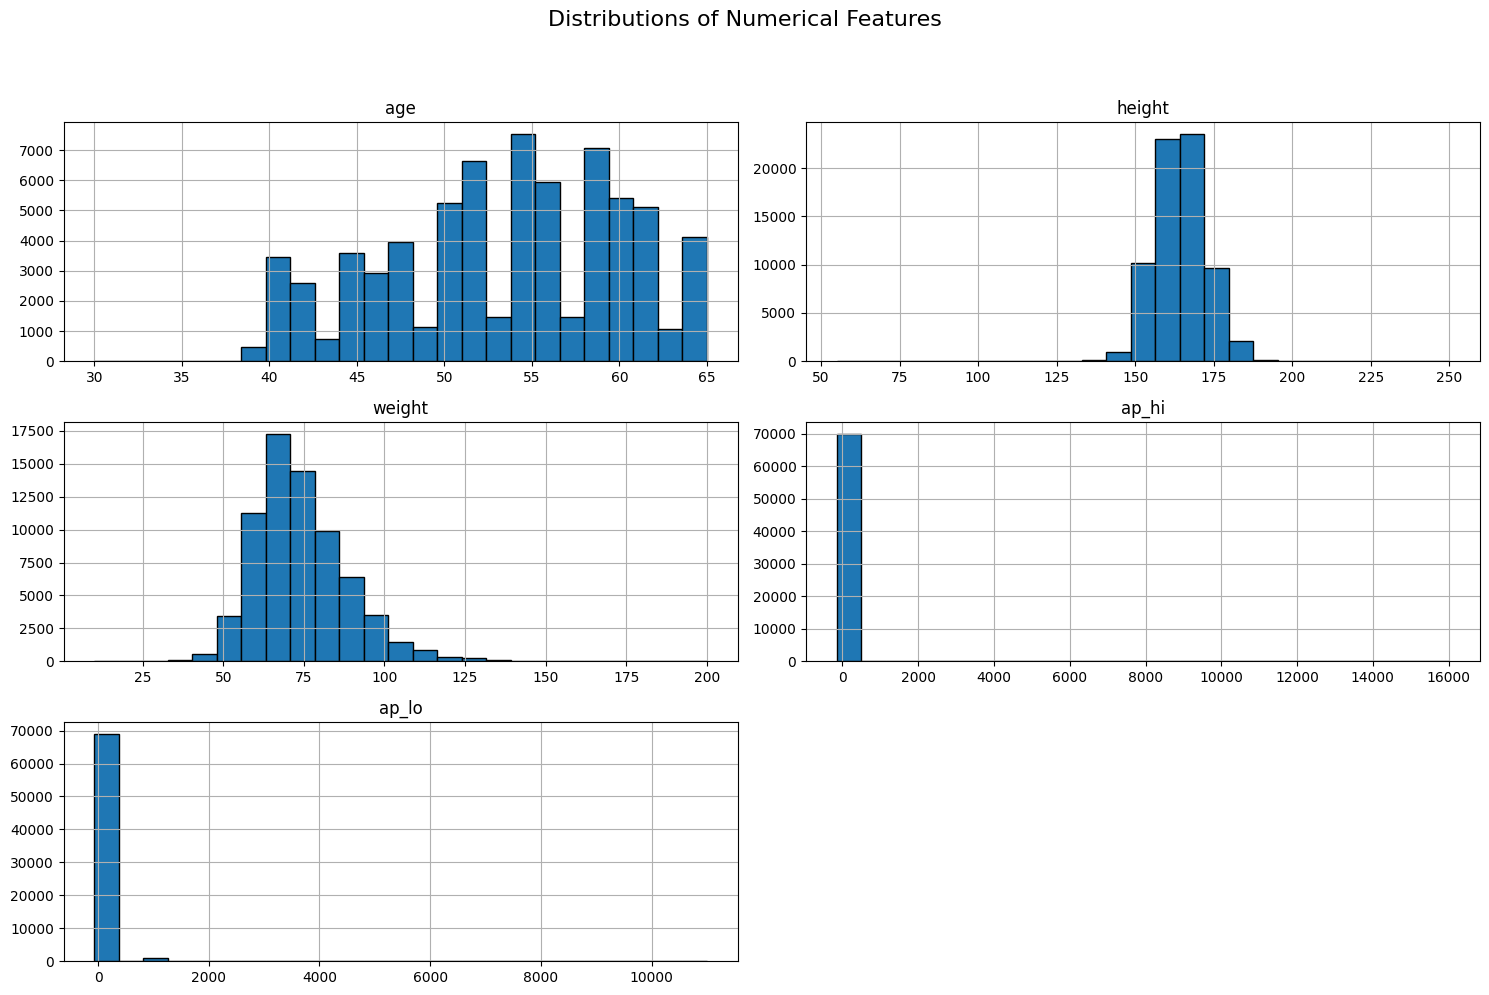

In [321]:
# Sayısal sütunları belirleyip sütun grafikleriyle inceliyoruz
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# hist() metodu ile histogramlar 
df[numerical_cols].hist(figsize=(15, 10), bins=25, edgecolor='black') 
plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Yaş ortalamasının 50 nin üzerinde olduğu görülüyor bundan yola çıkarak yaşlı insanlarda daha çok görüldüğünü söyleyebiliriz.

boy ve kilo dağılımları normal dağılıma yakın görünmekte.

ap_hi ve ap_low verileri tek sütun şeklinde görünüyor veride bir hata olabilir.

In [322]:
df[['ap_hi','ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


yüksek tansiyon için min -150 ve max 16020 gibi aykırı mümkün olmayan değerler var.

düşük tansiyon için de aynı şekilde min ve max değerler insan fizyolojisinin sınırları dışında hatalı veri girişi var.

(70000, 12)
(68671, 12)

Kan basıncı filtrelemesi sonrası kalan veri sayısı: 68671


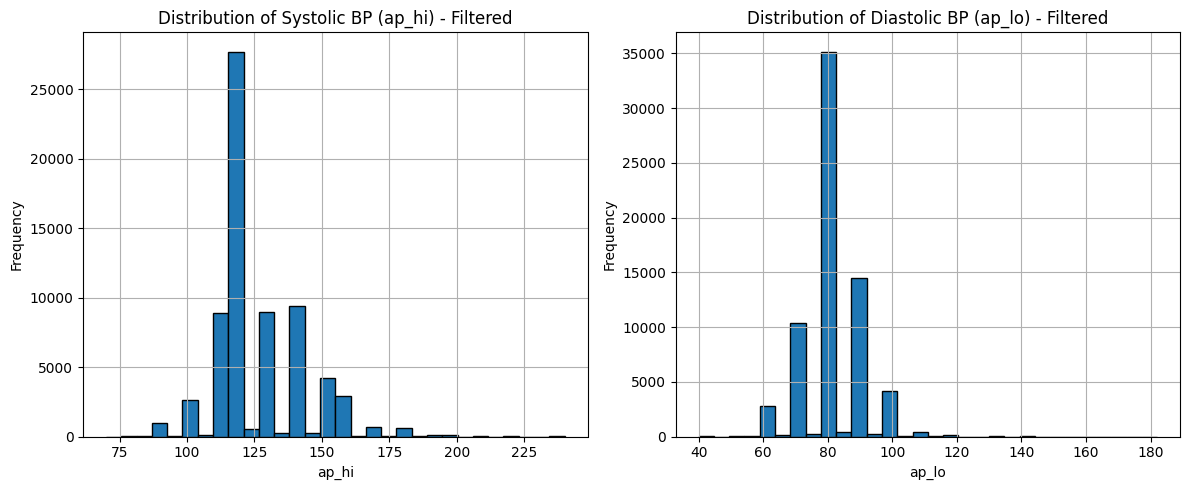

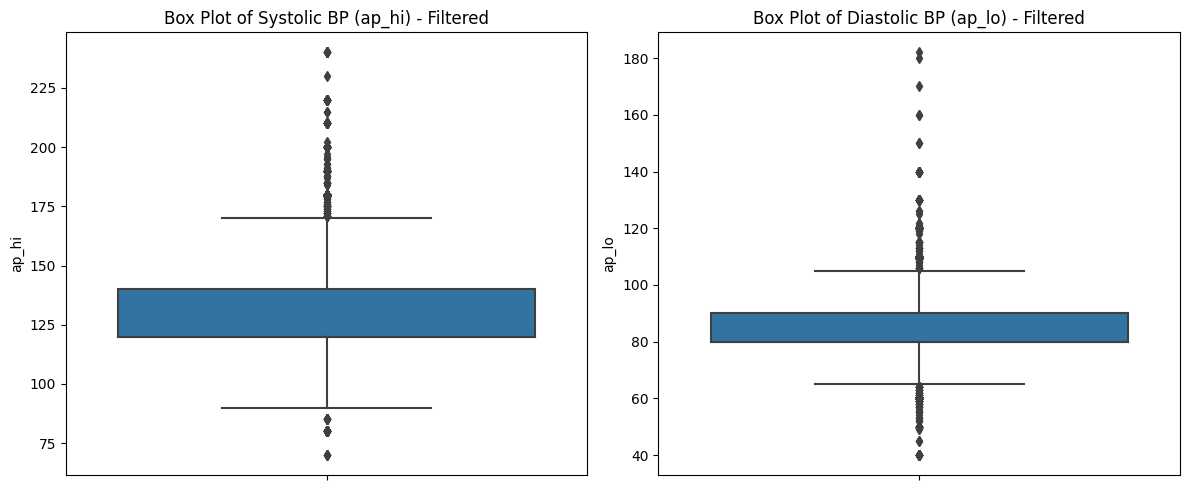

In [323]:
import matplotlib.pyplot as plt
# Aykırı değerleri içeren DataFrame'i yedekliyoruz.
df_original = df.copy() 

# Mantıksız kan basıncı değerlerini filtreleme işlemi:
# ap_hi'nin ap_lo'dan büyük olması, ap_hi'nin 70-250 arasında olması ve ap_lo'nun 40-200 arasında olması gereklidir.
print(df.shape)
df = df[
    (df['ap_hi'] > df['ap_lo']) &
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 200)
]
print(df.shape)#eksilen veri sayısını görmek için 

print(f"\nKan basıncı filtrelemesi sonrası kalan veri sayısı: {len(df_filtered_bp)}")

# Filtrelenmiş veri ile ap_hi ve ap_lo histogramları
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_filtered_bp['ap_hi'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Systolic BP (ap_hi) - Filtered')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_filtered_bp['ap_lo'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Diastolic BP (ap_lo) - Filtered')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Filtrelenmiş veri ile ap_hi ve ap_lo sütunlarının box plotları
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_filtered_bp['ap_hi'])
plt.title('Box Plot of Systolic BP (ap_hi) - Filtered')
plt.ylabel('ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_filtered_bp['ap_lo'])
plt.title('Box Plot of Diastolic BP (ap_lo) - Filtered')
plt.ylabel('ap_lo')

plt.tight_layout()
plt.show()

Büyük Tansiyon (ap_hi):
Çoğunluk Normal: Hastaların çoğu 120-130 arası tansiyona sahip
Az sayıda hastada yüksek tansiyon veya 90 altı düşük tansiyon var


Küçük Tansiyon (ap_lo):
80: En sağlıklı değer, çoğu hasta bu civarda
90: Hafif yüksek olanlar mevcut
Nadiren 100 üstü veya 60 altı hastalar var genel seyirde çoğu hastanın değerleri normal


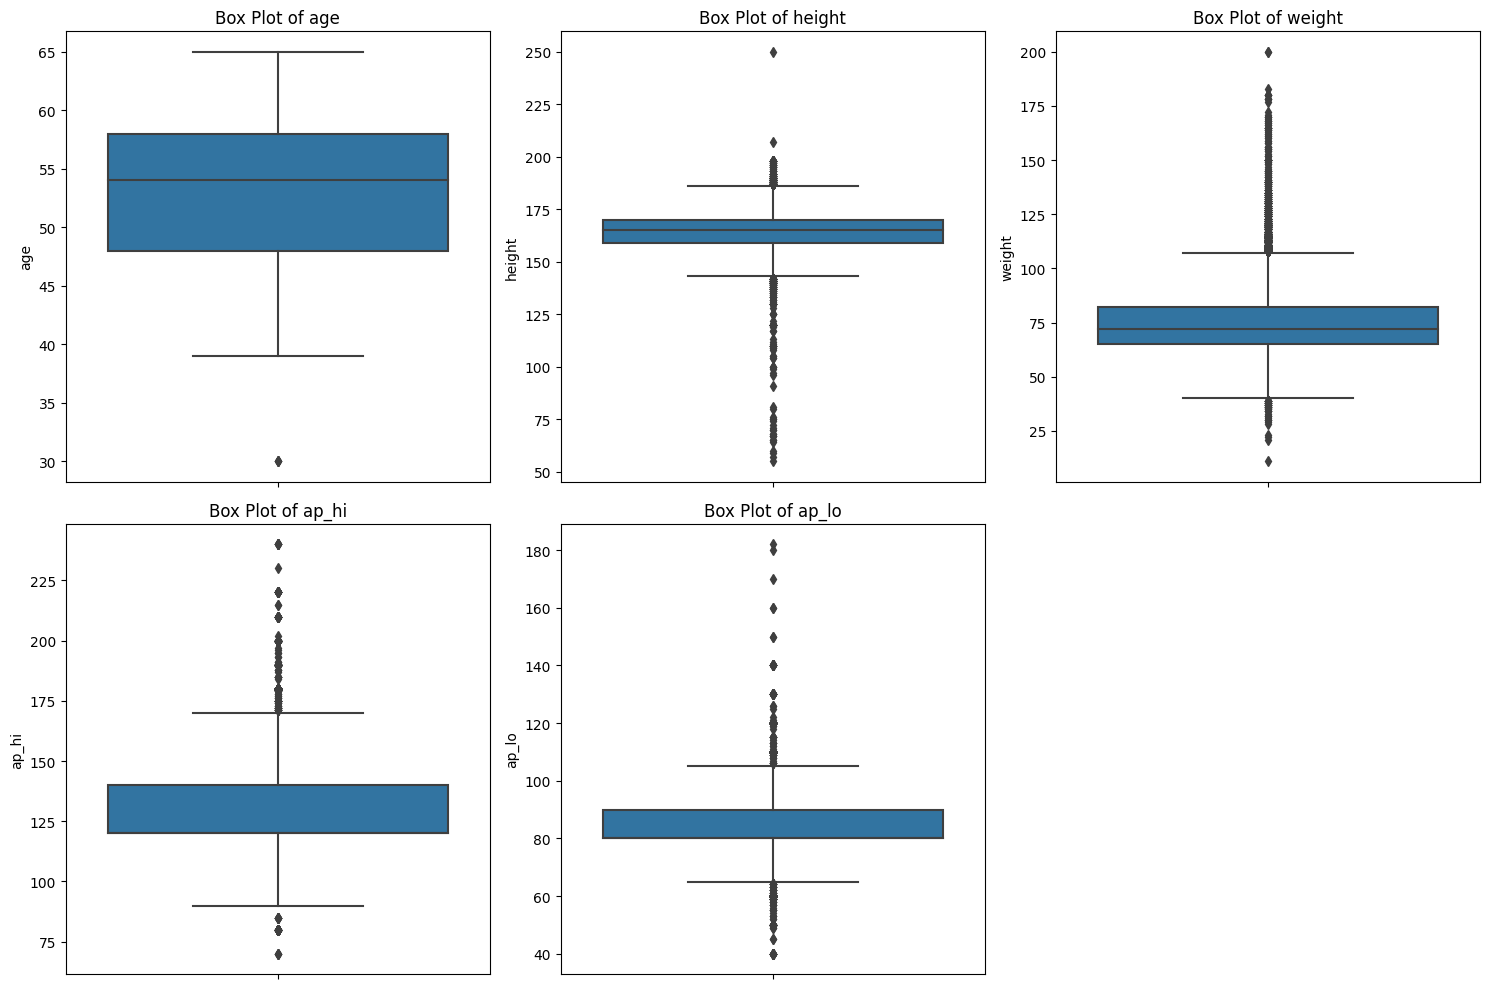

In [324]:
# Box plot Grafikleri  değer analizi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Yaş (age): İnsanların yaşları genel olarak 40 ile 60 arasında yoğunlaşmış. Yani veri setindeki çoğu hasta orta yaşlı. Çok genç veya aşırı yaşlı kişi sayısı çok düşük.
Boy (height): Hastaların boyları genellikle 150 cm ile 175 cm arasında değişiyor. Ortalama bir boy aralığı var. Ama bazı çok kısa (50 cm civarı) veya çok uzun (225 cm civarı) boy değerleri var. Bunlar gerçek dışı duruyor ve veri girişi hatası olabilir.
Kilo (weight): Hastaların kiloları çoğunlukla 60 kg ile 85 kg arasında. Kutu grafiği, daha yüksek kilolara doğru yayılan bir kuyruk olduğunu ve oldukça fazla sayıda yüksek kilolu (125 kg üzeri) kişi olduğunu gösteriyor. Bu uç değerler de kontrol edilmeli.
Sistolik Kan Basıncı (ap_hi): Büyük tansiyon değerlerinin çoğu 110 ile 140 arasında. Ortalama civarında yığılma var. Ama grafiğin alt ve üst tarafında çok aşırı uçlarda aykırı değerler var. Bu değerler tamamen yanlış veri girişleri gibi görünüyor ve temizlenmeleri gerekli.
Diyastolik Kan Basıncı (ap_lo): Küçük tansiyon değerlerinin çoğu 70 ile 90 arasında. Ancak ap_hi'de olduğu gibi, burada da eksi veya binli sayılar gibi tamamen yanlış ve düzeltilmesi gereken aşırı aykırı değerler var.

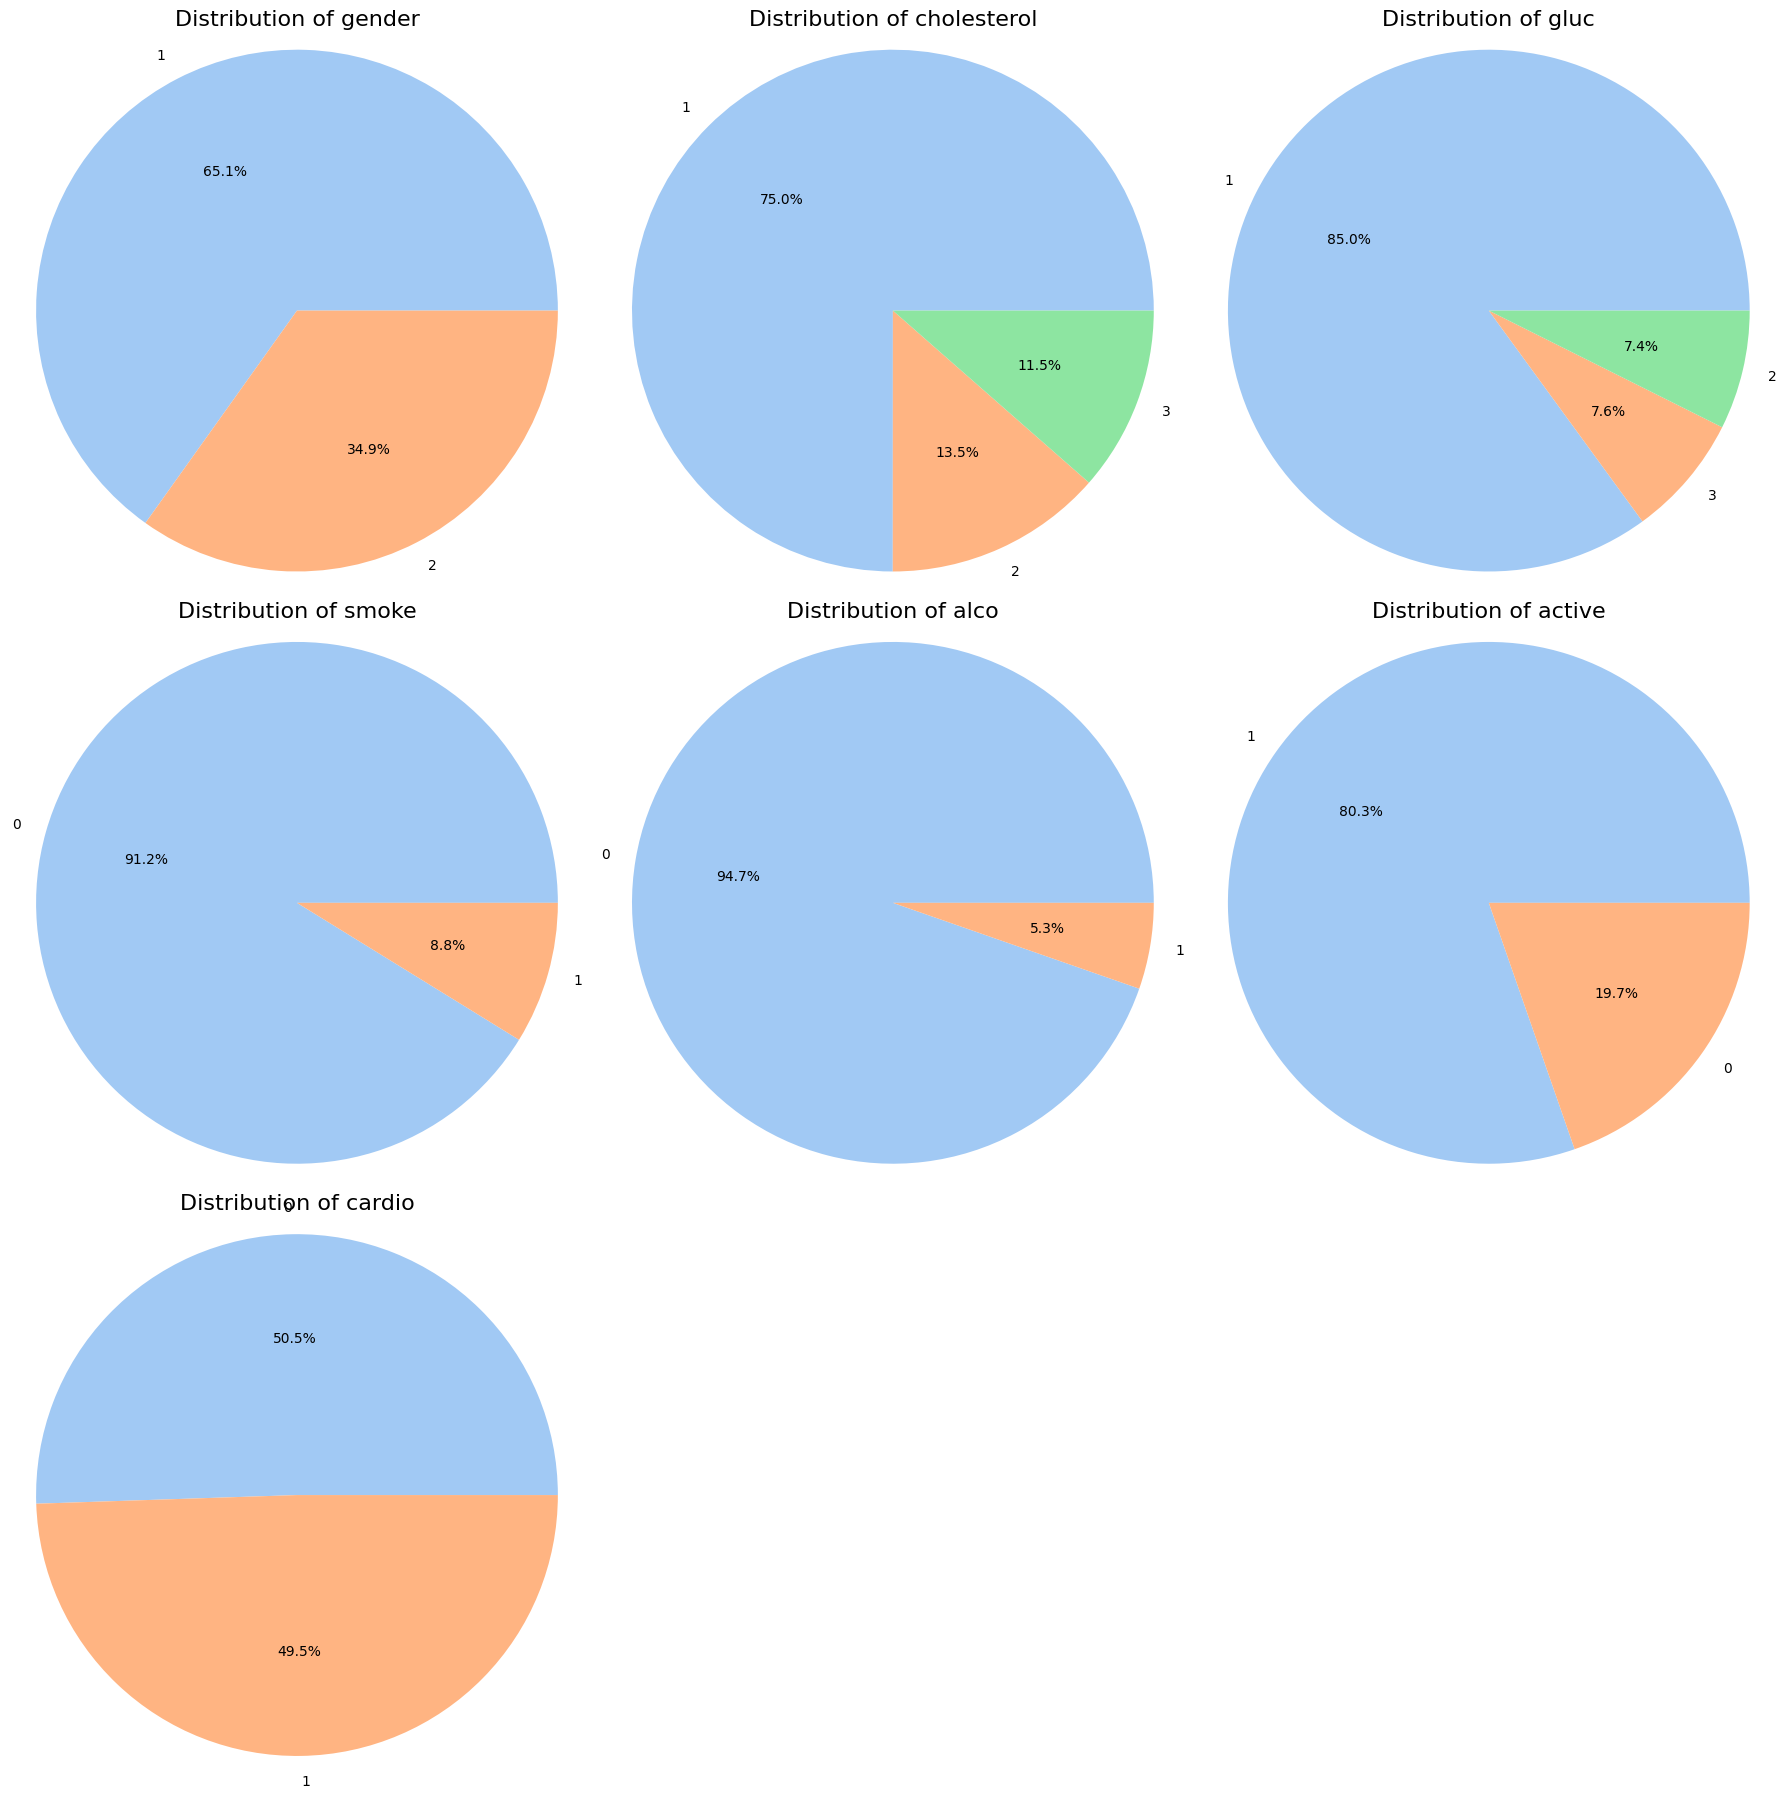

In [325]:
# Kategorik sütunları belirliyoruz
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Pie chart'ları oluşturuyoruz
plt.figure(figsize=(18, 18)) 

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) # Her satırda 3 grafik olacak şekilde düzenledik
    
    # Her kategorinin sayısını ve oranını hesaplıyoruz
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values
    
    # Renk paleti seçimi
    colors = sns.color_palette('pastel')[0:len(labels)]

    #pie chartımızı oluşturuyoruz
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.axis('equal') # Oranların daire şeklinde görünmesini sağlar

plt.tight_layout()
plt.show()

Cinsiyet (Gender):
Veri setinde kadınların erkeklerden biraz daha fazla olduğunu görüyoruz %69.1 - %34.9).

Kolesterol (Cholesterol):
Katılımcıların büyük çoğunluğunun kolesterol seviyesi '1' olarak işaretlenmiş (%75.0). Bu muhtemelen 'normal' seviyeyi temsil ediyor.
'2' ve '3' olarak işaretlenen, yani muhtemelen yüksek kolesterol seviyelerine sahip olan kişilerin oranları sırasıyla %11.5 ve %13.5. Bu, önemli bir azınlığın yüksek kolesterol problemi olduğunu gösteriyor.

Glikoz (Gluc):
Benzer şekilde, glikoz seviyesi '1' olan kişilerin oranı oldukça yüksek (%85.0). Bu da 'normal' glikoz seviyesine sahip çoğunluğu temsil ediyor.
Yüksek glikoz seviyelerine sahip olanlar (%7.6 ve %7.4) düşük ama dikkate değer bir oranda.

Sigara Kullanımı (Smoke):
Katılımcıların tamamına yakını sigara içmiyor (%91.2).
Sigara içenlerin oranı (%8.8) oldukça düşük.

Alkol Kullanımı (Alco):
Aynı şekilde alkol kullanmayanların oranı da çok yüksek (%94.7).
Alkol kullananların oranı oldukça düşük (%5.3).

Fiziksel Aktivite (Active):
Katılımcıların büyük bir kısmı fiziksel olarak aktif (%80.3).
Aktif olmayanların oranı (%19.7) briaz az.

Kalp Hastalığı (Cardio - Hedef Değişken):

Veri setinde kalp hastalığı olmayan (0) ve olan (1) kişilerin oranları neredeyse yarı yarıya (%50.5'e karşılık %49.5). 

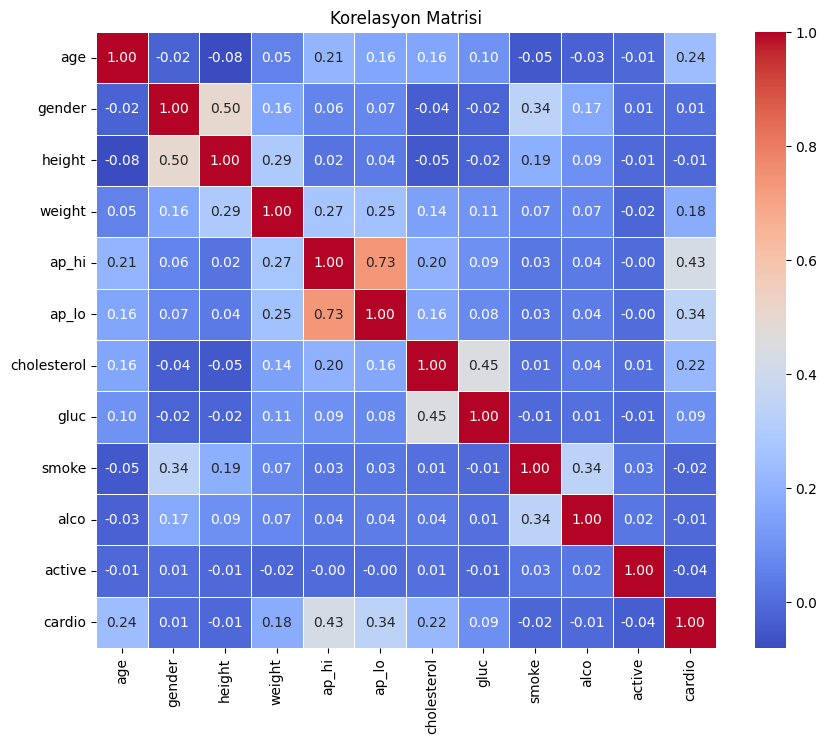

In [326]:
#korelasyon matrisi ile verilerin birbiri ile bağlantısını inceleyelim
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Matrisi')
plt.show()

age (yaş) ile cardio (kalp hastalığı) arasındaki korelasyon 0.24 olarak görülüyor. Yaş ilerledikçe kalp rahatsızlığı olma ihtimali hafifçe artıyor.

ap_hi ve ap_lo ile cardio arasındaki korelasyon (0.43 ve 0.34) dikkate değer bir oran tansiyon değerleri arttıkça kalp hastalığı riskinin de biraz arttığını gösteriyor

ağırlık(weight) ile de cardio arasındaki korelasyon 0.18 kilo arttıkça kalp hastalığı riskinin az da olsa arttığı gözlemlenebilir.

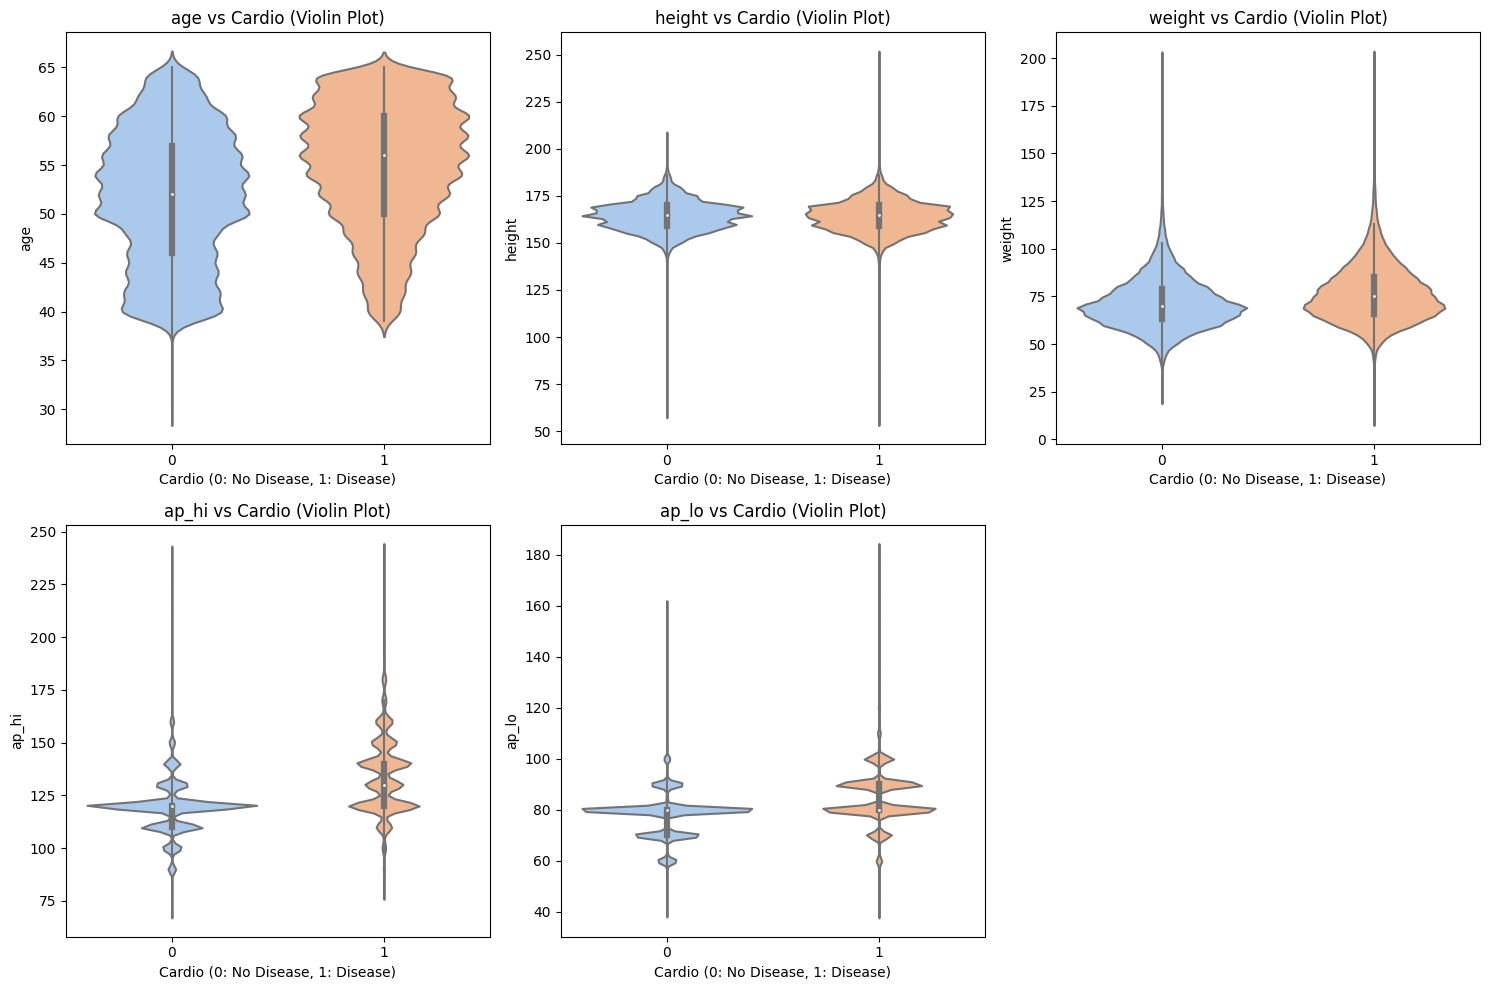

In [327]:
#numerik veriler ile cardio arasındaki ilişkiyi keman grafiği ile inceleyelim:
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x='cardio', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Cardio (Violin Plot)')
    plt.xlabel('Cardio (0: No Disease, 1: Disease)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


korelasyondakine benzer olarak yaş arttıkça cardio=1 yani kalp hastalığı olma ihtimali az da olsa artıyor.
Boy ile hastalık arasında gözle görülür bir bağlantı görülmüyor.
Ağırlık grafiğindeyse ağırlık arttıkça hastalıklı olan kişilerin daha fazla olduğu görülüyor.
son olarak korelasyon matrisine benzer olarak tansiyon değerleri arttıkça hastalığın olma ihtimalinin bir miktar arttığı gözlemleniyor.

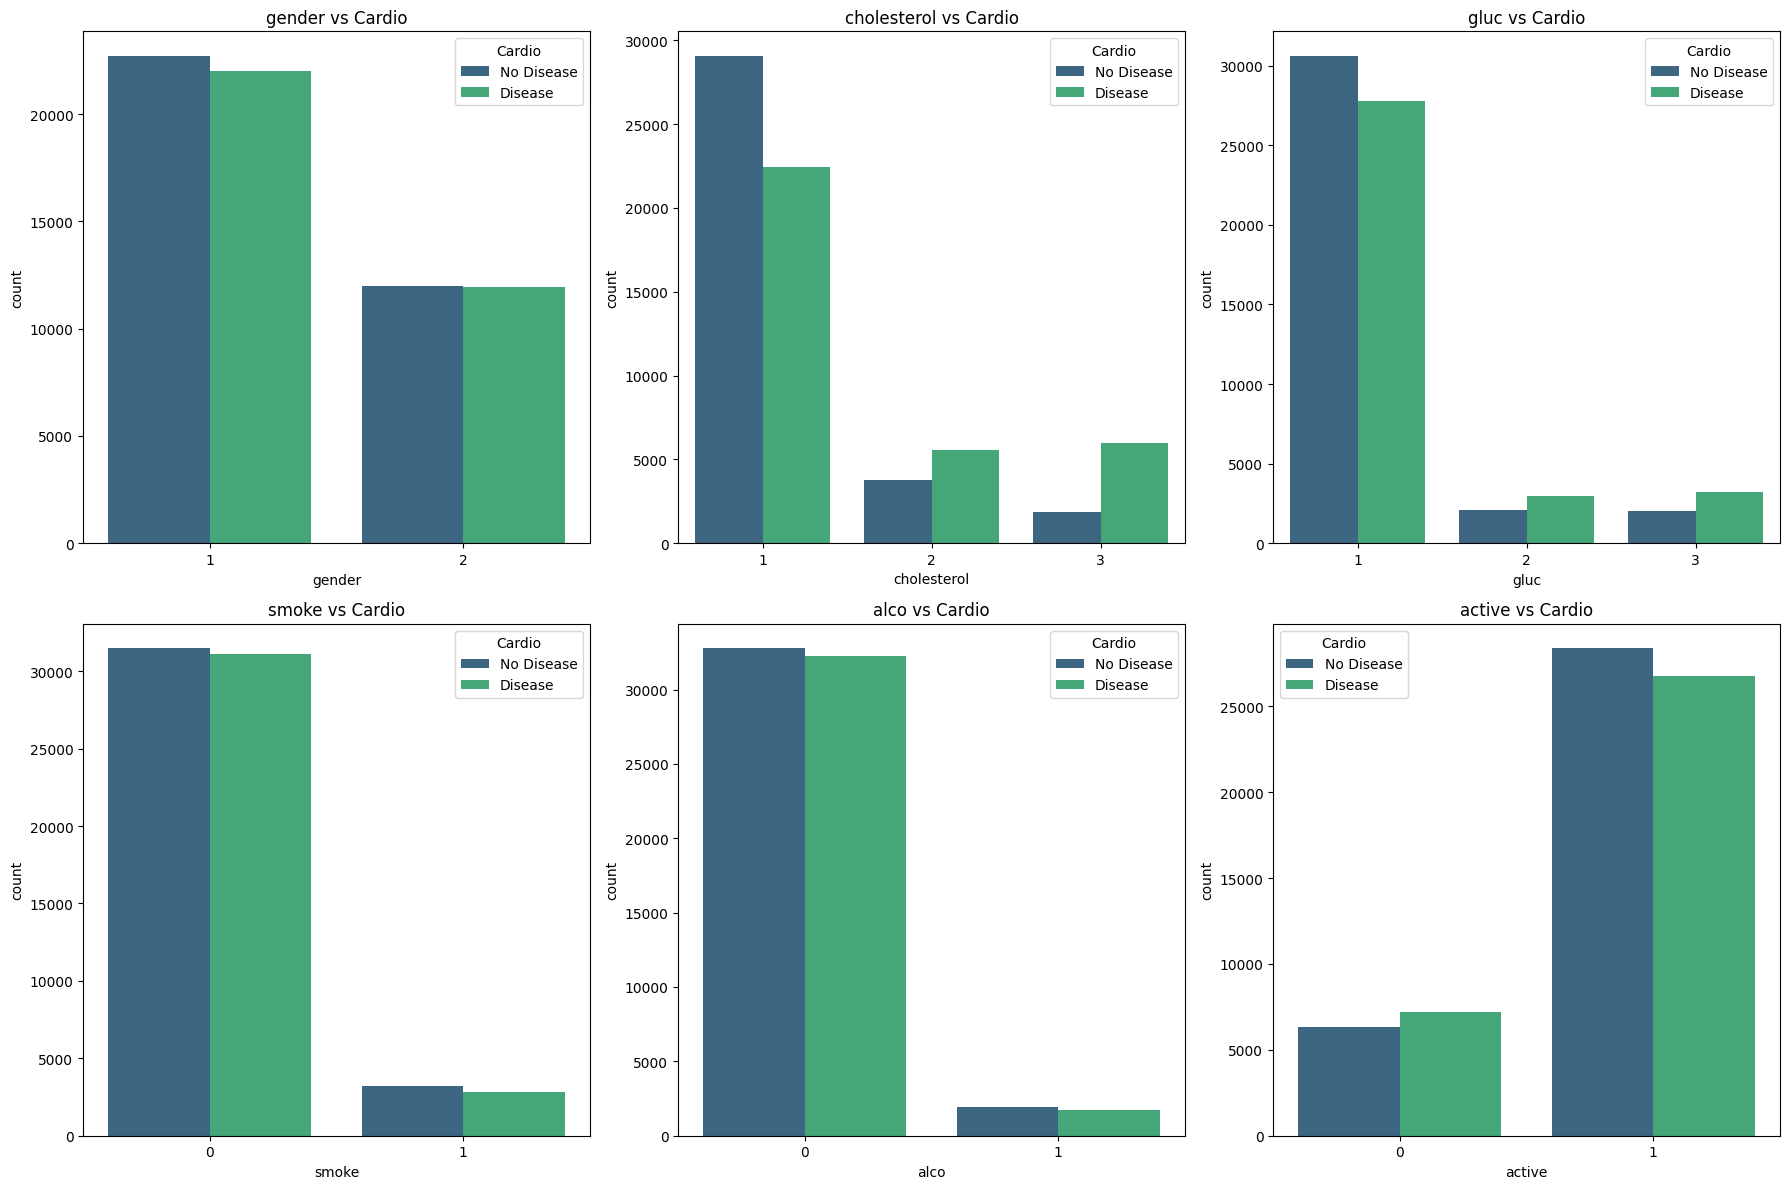

In [328]:
#Boolean değerler alan veriler ile hastalık arasındaki bağlantıyı görmek için countplot kullanıyoruz.
categorical_cols= ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='cardio', data=df, palette='viridis')
    plt.title(f'{col} vs Cardio')
    plt.legend(title='Cardio', labels=['No Disease', 'Disease']) 
plt.tight_layout()
plt.show()

cinsiyet için kadınlarda hasta olma oranının çok az düşük olduğu görülüyor erkeklerde ise bu oran yarı yarıya olmaya daha yakın

kolesterol için 1: normal düzeyde olanların hastalığa yakalanma ihtimali daha düşük iken 2 ve 3 yani normalin üzerinde kolesterol arttıkça hasta olanların sayısı olmayanların sayısına göre git gite artıyor.

glukoz için de kolesterole benzer ancak daha düşük etkili bir durum mevcut

sigara içenler ile içmeyenler arasında bariz bir fark görülmüyor.

alkol için de aynı şekilde belirgin bir fark gözlenmiyor

In [329]:
df.shape # Veri temizlemesinden önceki veri boyutu

(68671, 12)

age temizliği sonrası veri seti boyutu: (68667, 12)
height temizliği sonrası veri seti boyutu: (68162, 12)
weight temizliği sonrası veri seti boyutu: (66477, 12)
ap_hi temizliği sonrası veri seti boyutu: (65567, 12)
ap_lo temizliği sonrası veri seti boyutu: (62499, 12)
ap_hi > ap_lo kontrolü sonrası veri seti boyutu: (62499, 12)

IQR Temizliği sonrası DataFrame'in ilk 5 satırı:
   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
5   60       1     151    67.0    120     80            2     2      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
5       0       0  

IQR Temizliği son

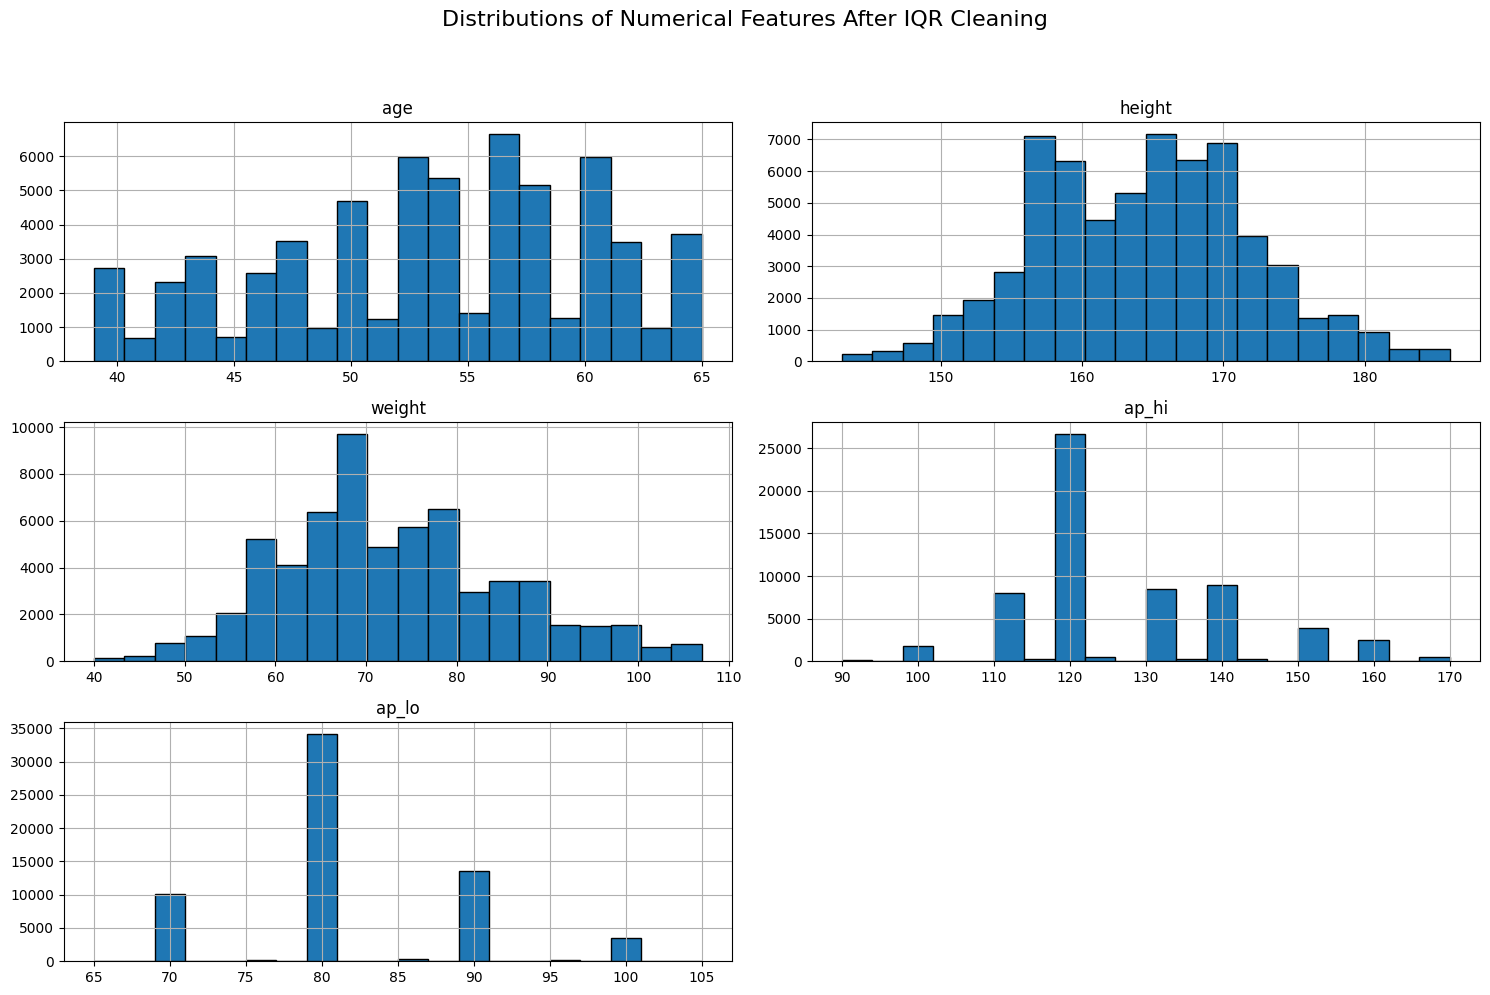

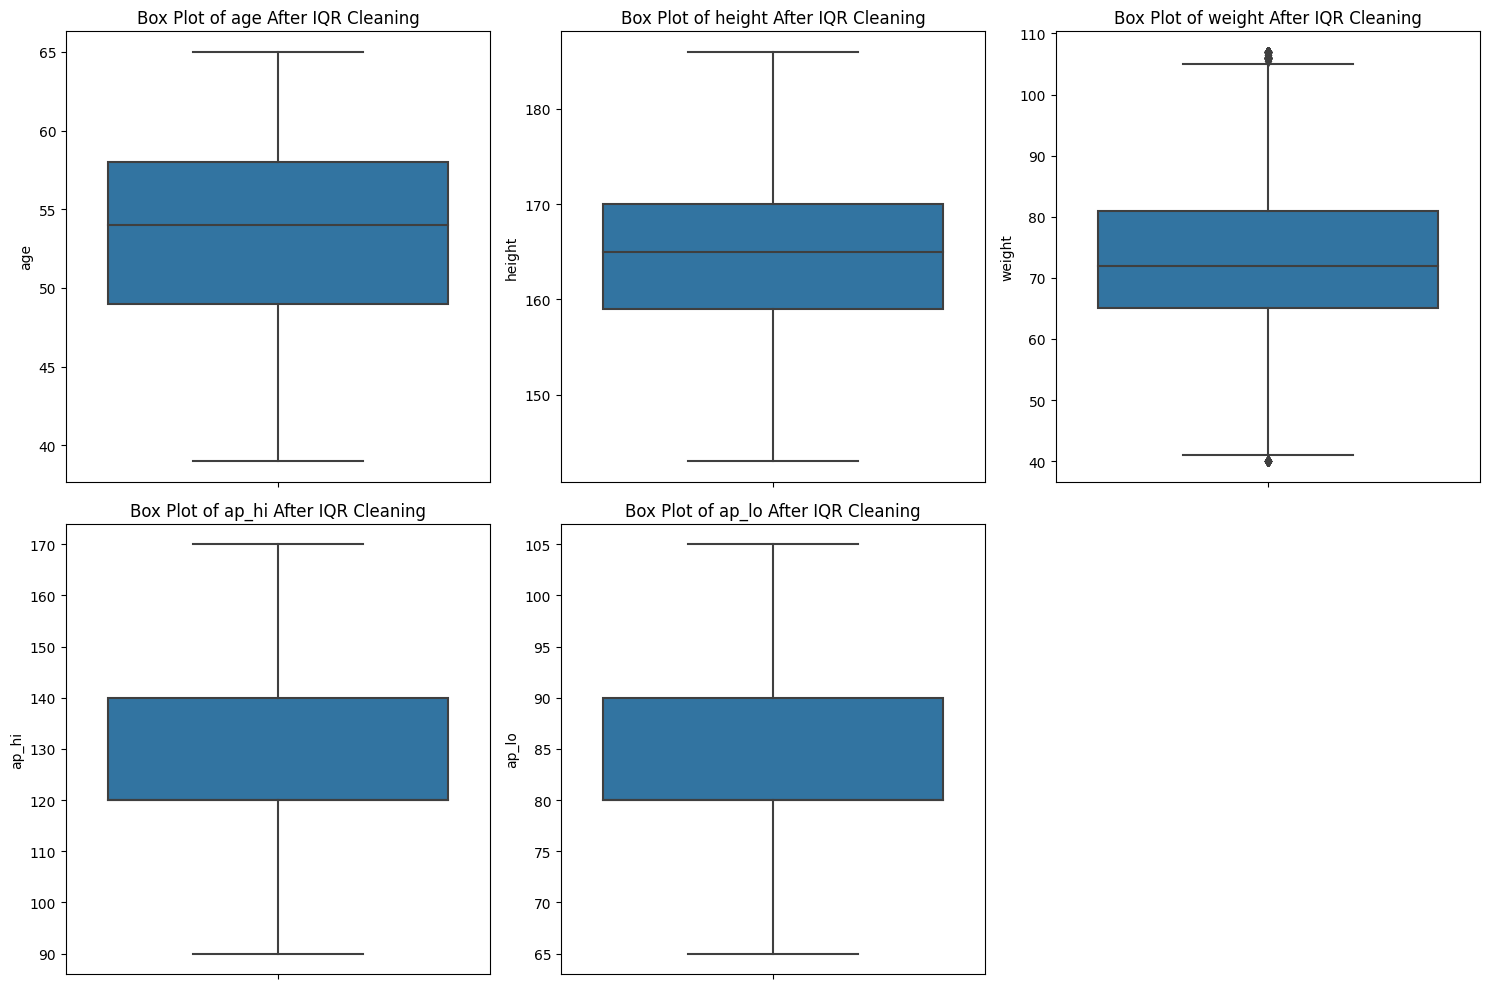

In [330]:
# iiqr kullanarak 1. ve 3. çeyreklik arasında kalan değerleri alıyoruz aykırı veriden kurtulmak için
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Alt ve üst sınırların dışındaki değerleri filtreleme işlemi
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"{col} temizliği sonrası veri seti boyutu: {df.shape}")

# Ek olarak, tansiyon değerleri için fizyolojik kuralı tekrar uygulayalım
# (ap_hi > ap_lo olması gerek küçük tansiyon büyük olamaz)
df = df[df['ap_hi'] > df['ap_lo']]
print("ap_hi > ap_lo kontrolü sonrası veri seti boyutu:", df.shape)


print("\nIQR Temizliği sonrası DataFrame'in ilk 5 satırı:")
print(df.head())
print("\nIQR Temizliği sonrası DataFrame bilgisi:")
print(df.info())

# Temizleme sonrası sayısal sütunların dağılımlarını tekrar görselleştirelim
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numerical Features After IQR Cleaning', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} After IQR Cleaning')
plt.tight_layout()
plt.show()

İnsanda olması mümkün olmayan veya çok uç değerleri temizledikten sonra veride gözle görülür bir değişiklik gözlemliyoruz özellikle tansiyon grafikleri daha anlaşılır hale geldi ve box plotlar normale çok yakın bir duruma geldi


In [331]:
"""Modelin kategorik değerleri yanlış yorumlamaması için dönüşüm uygulayacağız
Gender için sıralama olmadığı için one-hot encoding uygulayacağız\
Diğer veriler arasında normal-yüksek gibi sıralama olduğu için Label Encoding daha doğru bir yaklaşım.

Eğer 'gender' sütunu hala varsa :
"""
if 'gender' in df.columns:
    df = pd.get_dummies(df, columns=['gender'], drop_first=True, prefix='gender') # prefix ekleyerek daha açıklayıcı isim verelim
else:
    print("Uyarı: 'gender' sütunu zaten dönüştürülmüş veya mevcut değil.")
print("gender_2 = Erkek True ise Erkek False ise Kadın")
print("\nOne-Hot Encoding sonrası DataFrame'in ilk 5 satırı:")
print(df.head())
print("\nOne-Hot Encoding sonrası DataFrame bilgisi:")
print(df.info())

#cholesterol ve gluc zaten sıralı ve anlam taşıyan değerler içerdiği için label encodinge gerek duymadım.


gender_2 = Erkek True ise Erkek False ise Kadın

One-Hot Encoding sonrası DataFrame'in ilk 5 satırı:
   age  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0   50     168    62.0    110     80            1     1      0     0       1   
1   55     156    85.0    140     90            3     1      0     0       1   
2   52     165    64.0    130     70            3     1      0     0       0   
3   48     169    82.0    150    100            1     1      0     0       1   
5   60     151    67.0    120     80            2     2      0     0       0   

   cardio  gender_2  
0       0      True  
1       1     False  
2       1     False  
3       1      True  
5       0     False  

One-Hot Encoding sonrası DataFrame bilgisi:
<class 'pandas.core.frame.DataFrame'>
Index: 62499 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          62499 non-null  int64  
 1   height

In [332]:
# ----- ÖZELLİK ÖLÇEKLENDİRME -----
from sklearn.preprocessing import StandardScaler
# Ölçeklenecek sayısal sütunları belirleyelim (hedef değişken 'cardio' ve ikili/kategorik olanlar hariç)
# One-Hot Encoding sonrası oluşan 'gender_2' sütunu ölçeklenmez.
cols_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo'] 
# cholesterol ve gluc ordinal olduğu için isteğe bağlı olarak ölçeklenebilirler,
# ancak genellikle modelin bunları sıralı olarak yorumlaması için ölçeklemeyiz.

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\nÖzellik Ölçeklendirme sonrası DataFrame'in ilk 5 satırı:")
print(df.head())
print("\nÖzellik Ölçeklendirme sonrası sayısal sütunların istatistiksel özeti:")
print(df[cols_to_scale].describe())


Özellik Ölçeklendirme sonrası DataFrame'in ilk 5 satırı:
        age    height    weight     ap_hi     ap_lo  cholesterol  gluc  smoke  \
0 -0.500664  0.477303 -0.911113 -1.149303 -0.221345            1     1      0   
1  0.241715 -1.116131  0.963190  0.950284  1.082015            3     1      0   
2 -0.203712  0.078944 -0.748130  0.250422 -1.524706            3     1      0   
3 -0.797615  0.610089  0.718716  1.650146  2.385376            1     1      0   
5  0.984095 -1.780062 -0.503656 -0.449441 -0.221345            2     2      0   

   alco  active  cardio  gender_2  
0     0       1       0      True  
1     0       1       1     False  
2     0       0       1     False  
3     0       1       1      True  
5     0       0       0     False  

Özellik Ölçeklendirme sonrası sayısal sütunların istatistiksel özeti:
                age        height        weight         ap_hi         ap_lo
count  6.249900e+04  6.249900e+04  6.249900e+04  6.249900e+04  6.249900e+04
mean  -3.240127e

age, height, weight, ap_hi, ap_lo sütunlarındaki değerlerin artık negatif ve pozitif ondalıklı sayılar (z-skorları) haline geldiğini görüyoruz.
hepsinin ortalaması neredeyse 0 ve standart sapmaları neredeyse 1 
Standardizasyon başarılı.

Modelimizi eğitmek ve performansını objektif bir şekilde değerlendirmek için veri setimizi eğitim (train) ve test (test) kümelerine ayırmamız gerekiyor.

In [333]:
from sklearn.model_selection import train_test_split

#Modelimizi eğitmek ve performansını objektif bir şekilde değerlendirmek için veri setimizi eğitim (train) ve test (test) kümelerine ayırmamız gerekiyor.
# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak ayırıyoruz
# Hedef değişken 'cardio' (kalp hastalığı)
X = df.drop('cardio', axis=1)
y = df['cardio']

print("Bağımsız değişkenler (X) DataFrame boyutu:", X.shape)
print("Bağımlı değişken (y) Serisi boyutu:", y.shape)

Bağımsız değişkenler (X) DataFrame boyutu: (62499, 11)
Bağımlı değişken (y) Serisi boyutu: (62499,)


In [334]:
# Veriyi eğitim ve test kümelerine %80 eğitim, %20 test olacak şekilde böleceğiz
# random_state parametresi, her çalıştırdığımızda aynı bölünmeyi sağlar, bu da sonuçların tekrar üretilebilirliği için önemlidir.
# stratify=y parametresi, y (hedef değişken) sınıflarının (0 ve 1) eğitim ve test kümelerinde aynı oranda dağılmasını sağlar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nEğitim veri kümesi boyutu (X_train): {X_train.shape}")
print(f"Test veri kümesi boyutu (X_test): {X_test.shape}")
print(f"Eğitim hedef kümesi boyutu (y_train): {y_train.shape}")
print(f"Test hedef kümesi boyutu (y_test): {y_test.shape}")

# Hedef değişkenin eğitim ve test setlerindeki dağılımını kontrol edelim
print("\nEğitim setindeki hedef değişken dağılımı (y_train):")
print(y_train.value_counts(normalize=True))
print("\nTest setindeki hedef değişken dağılımı (y_test):")
print(y_test.value_counts(normalize=True))


Eğitim veri kümesi boyutu (X_train): (49999, 11)
Test veri kümesi boyutu (X_test): (12500, 11)
Eğitim hedef kümesi boyutu (y_train): (49999,)
Test hedef kümesi boyutu (y_test): (12500,)

Eğitim setindeki hedef değişken dağılımı (y_train):
cardio
0    0.50611
1    0.49389
Name: proportion, dtype: float64

Test setindeki hedef değişken dağılımı (y_test):
cardio
0    0.50608
1    0.49392
Name: proportion, dtype: float64


Veriyi başarılı şekilde %80 eğitim ve %20 test olarak böldük

# Algoritma Seçimi & Hiperparametre Optimizasyonu

In [335]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Modelleri Tanımlama ve Eğitme ---

models = {
    "Lojistik Regresyon": LogisticRegression(random_state=42, solver='liblinear'), # liblinear küçük veri setleri için iyi
    "Karar Ağacı": DecisionTreeClassifier(random_state=42),
    "K-En Yakın Komşu (KNN)": KNeighborsClassifier(),
    "Destek Vektör Makinesi (SVM)": SVC(random_state=42)
}

results = {}

#modelleri eğitme
for name, model in models.items():
    print(f"\n--- {name} Eğitiliyor ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Sonuçları DataFrame olarak gösterelim
results_df = pd.DataFrame(results).T
print("\n--- Model Performans Karşılaştırması (Temel Ayarlar) ---")
print(results_df)


--- Lojistik Regresyon Eğitiliyor ---
Accuracy: 0.7185
Precision: 0.7444
Recall: 0.6548
F1 Score: 0.6968

--- Karar Ağacı Eğitiliyor ---
Accuracy: 0.6308
Precision: 0.6286
Recall: 0.6173
F1 Score: 0.6229

--- K-En Yakın Komşu (KNN) Eğitiliyor ---
Accuracy: 0.6938
Precision: 0.6931
Recall: 0.6822
F1 Score: 0.6876

--- Destek Vektör Makinesi (SVM) Eğitiliyor ---
Accuracy: 0.7271
Precision: 0.7572
Recall: 0.6587
F1 Score: 0.7045

--- Model Performans Karşılaştırması (Temel Ayarlar) ---
                              Accuracy  Precision    Recall  F1 Score
Lojistik Regresyon             0.71848   0.744430  0.654843  0.696769
Karar Ağacı                    0.63080   0.628567  0.617266  0.622865
K-En Yakın Komşu (KNN)         0.69384   0.693105  0.682216  0.687617
Destek Vektör Makinesi (SVM)   0.72712   0.757215  0.658730  0.704547


SVM ve Lojistik Regresyon kalp hastalığı teşhisi için en başarılı algoritmalardır.
Doğruluk payları %71-%72 gibi değerlerde olup gerçek hastaların %30-%35 lik kısmına yanlış teşhis koyulabileceğini göstermektedir

In [336]:
print("\n--- En iyi Modeller için Cross-Validation Performansları ---")
#svm çalışması çok uzun sürdüğü için KNN kullanmaya karar verdik.
best_models = {"Lojistik Regresyon": LogisticRegression(random_state=42, solver='liblinear'),
              "K-En Yakın Komşu (KNN)": KNeighborsClassifier()
              }
cv_results = {}

for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy') 
    print(f"{name} - Cross-Validation Doğruluğu: {scores.mean():.4f} (+/- {scores.std():.4f})")
    cv_results[name] = scores.mean()

best_models = max(cv_results, key=cv_results.get)
print(f"\nCross-Validation sonuçlarına göre en iyi model: {best_models}")


--- En iyi Modeller için Cross-Validation Performansları ---
Lojistik Regresyon - Cross-Validation Doğruluğu: 0.7243 (+/- 0.0028)
K-En Yakın Komşu (KNN) - Cross-Validation Doğruluğu: 0.6930 (+/- 0.0016)

Cross-Validation sonuçlarına göre en iyi model: Lojistik Regresyon


Lojistik Regresyon, %72.43'lük ortalama doğruluk ve düşük standart sapma ile en iyi performansı gösteren model olarak öne çıkmaktadır. Bu, Lojistik Regresyon'un hem genel olarak iyi tahminler yapabildiğini hem de bu tahminlerinin farklı veri bölümlerinde tutarlı olduğunu gösterir.


--- Lojistik Regresyon için GridSearchCV Başlatılıyor ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits

En iyi parametreler: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
En iyi cross-validation skoru (Accuracy): 0.7244

Optimize Edilmiş Lojistik Regresyon Modelinin Test Seti Performansı:
Accuracy: 0.7185
Precision: 0.7444
Recall: 0.6548
F1 Score: 0.6968


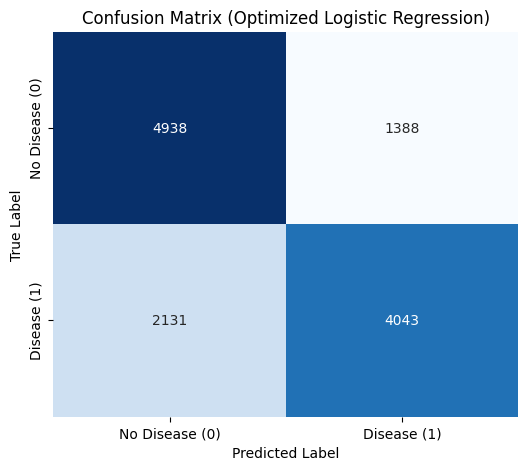

In [337]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Lojistik Regresyon İçin Hiperparametre Optimizasyonu ---

# Parametre ızgarasını tanımlayalım
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularizasyon gücünün tersi
    'penalty': ['l1', 'l2'],             # Regularizasyon tipi
    'solver': ['liblinear']              # l1 ve l2'yi destekleyen optimize edici
}

# GridSearchCV nesnesini oluşturalım
# estimator: Optimize edilecek model (Lojistik Regresyon)
# param_grid: Denenecek parametreler
# cv: Çapraz doğrulama kat sayısı (5 katlı çapraz doğrulama)
# scoring: Optimizasyon için kullanılacak metrik ('accuracy' - doğruluk)
# n_jobs=-1: Tüm CPU çekirdeklerini kullan (eğer mümkünse, işlemi hızlandırır)
# verbose=1: İşlem sırasında bilgi mesajları gösterir
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

print("\n--- Lojistik Regresyon için GridSearchCV Başlatılıyor ---")
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru alalım
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_ # En iyi modeli içeren nesne

print(f"\nEn iyi parametreler: {best_params}")
print(f"En iyi cross-validation skoru (Accuracy): {best_score:.4f}")

# Optimize edilmiş model ile test seti üzerinde performans değerlendirmesi yapıyoruz
y_pred_optimized = best_estimator.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print(f"\nOptimize Edilmiş Lojistik Regresyon Modelinin Test Seti Performansı:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1 Score: {f1_optimized:.4f}")

# Karışıklık Matrisini (Confusion Matrix) de görselleştirelim
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Optimized Logistic Regression)')
plt.show()

Çapraz doğrulama sonuçlarına göre en iyi model olarak seçilen Lojistik Regresyon için hiperparametre optimizasyonu, GridSearchCV yöntemi kullanılarak gerçekleştirilmiştir.

Optimize edilmiş modelin test performansının, temel ayarlarla eğitilen Lojistik Regresyon modelinin performansıyla aynı olması ya modelin başlangıç ayarlarının zaten yeterince iyi olduğunu ya da denenen hiperparametre aralığının model performansında daha büyük bir artış yaratmadığını düşündürüyor.


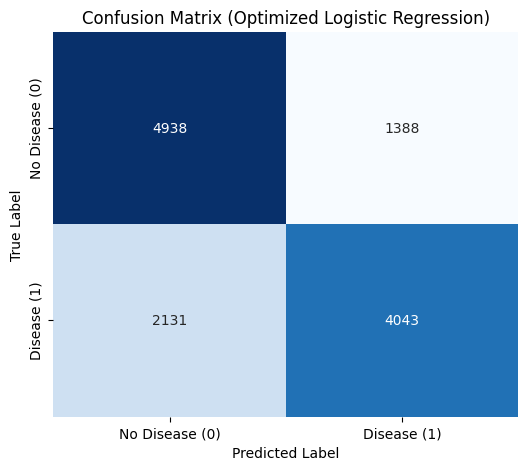

In [338]:
#Confusion Matrix oluşturma
cm = confusion_matrix(y_test, y_pred_optimized)
y_pred_optimized = best_estimator.predict(X_test)

#Confusion Matrixi tekrar görselleştiriyoruz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Optimized Logistic Regression)')
plt.show()

Modelin karışıklık matrisi, hem sağlıklı hem de hasta bireyleri yüksek oranda doğru bir şekilde tanımlayabiliyor. Ancak 2131 yanlış negatif (FN) durumu önemlidir, çünkü hastalar için tedavide gecikmelere veya daha büyük sorunlara yol açabileceği için dikkat edilmesi önemlidir. Ayrıca, 1388 yanlış pozitif (FP) sayısı gereksiz testlere ve endişelere yol açabilir.

Modelin %74.44'lük yüksek doğruluğu, "kalp hastalığı var" dediği kişilerin büyük çoğunluğunun gerçekten hasta olduğunu gösteriyor. Ancak %65.48'lik duyarlılık, modelin hasta bireylerin yaklaşık üçte birini gözden kaçırdığını göstermektedir.

# Akbank Makine Öğrenmesi Bootcamp: Kalp Hastalığı Risk Tahmini Projesi
## 1. Proje Hakkında
kaggle linki : (https://www.kaggle.com/code/irfanburakege/ml25-irfanburakege)

Bu proje, Akbank Makine Öğrenmesi Bootcamp kapsamında gerçekleştirilen, gözetimli öğrenme teknikleriyle bir sınıflandırma problemi çözmeyi amaçlayan bir çalışmadır. Temel amaç, bireylerin çeşitli tıbbi ve demografik özelliklerine dayanarak kardiyovasküler (kalp) hastalığı riskini tahmin eden bir makine öğrenimi modeli geliştirmektir. Bu proje, veri analizi, model geliştirme ve değerlendirme konularında pratik deneyim kazanmayı hedeflemektedir.

## 2. Kullanılan Veri Seti
Projede, Kaggle platformundan elde edilen "Cardiovascular Disease dataset" kullanılmıştır.

Veri Seti Linki: [Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
Veri Boyutu: 70.000 veri içermektedir.
Özellikler: Veri seti; yaş, cinsiyet, boy, kilo, kan basıncı (sistolik ve diyastolik), kolesterol seviyesi, glikoz seviyesi, sigara kullanımı, alkol kullanımı, fiziksel aktivite ve hedef değişken olan kalp hastalığı varlığı (cardio) gibi özellikleri barındırmaktadır.

## 3. Geliştirme Ortamı ve Araçlar
IDE/Platform: Kaggle Notebook.
Kütüphaneler: pandas, numpy, matplotlib ve seaborn, scikit-learn.

## 4. Proje Adımları ve Metodoloji
Proje, aşağıdaki adımları takip ederek bir makine öğrenimi gerçekleştirmektedir:

### 4.1. Keşifsel Veri Analizi (EDA) 
Veri setinin yapısını anlamak, eksik değerleri, aykırı değerleri ve özellikler arası ilişkileri tespit etmek amacıyla kapsamlı EDA yapılmıştır.

Ana Bulgular:
ap_hi (sistolik) ve ap_lo (diyastolik) kan basıncı sütunlarında fizyolojik olarak imkansız (negatif, aşırı yüksek) aykırı değerler tespit edilmiştir.
Boy ve kilo sütunlarında da bazı uç aykırı değerler gözlemlenmiştir.
Kolesterol ve glikoz seviyelerinin kalp hastalığı riskiyle pozitif ilişkisi olduğu, yaşın da kalp hastalığı riskini artırdığı gözlemlenmiştir.
Cinsiyet, sigara, alkol ve fiziksel aktivite gibi diğer özelliklerin kalp hastalığı ile doğrudan ilişkisi bu aşamada zayıf görülmüştür.
Hedef değişken (cardio) sınıflarının (0: Hastalık yok, 1: Hastalık var) yaklaşık olarak dengeli (yarı yarıya) dağıldığı görülmüştür.

### 4.2. Veri Ön İşleme 
Ham verinin model eğitimine uygun hale getirilmesi için çeşitli ön işleme adımları uygulanmıştır.

Aykırı Değer Temizliği: Yaş, boy, kilo, sistolik ve diyastolik kan basıncı (ap_hi, ap_lo) sütunlarındaki mantıksız ve aşırı uç değerler, IQR (Interquartile Range) yöntemi ve fizyolojik kurallar (ap_hi > ap_lo gibi) kullanılarak temizlenmiştir. Bu temizlik sonrası veri seti boyutu 70.000'den 62.499'a düşmüştür.
Kategorik Değişken Dönüşümü: gender (cinsiyet) sütunu nominal bir değişken olduğu için One-Hot Encoding yöntemiyle dönüştürülmüştür. cholesterol ve gluc gibi sıralı (ordinal) kategorik değişkenler zaten sayısal değerler içerdiği için doğrudan kullanılmıştır.
Özellik Ölçeklendirme: Farklı ölçeklerdeki sayısal özellikler (age, height, weight, ap_hi, ap_lo), StandardScaler kullanılarak standartlaştırılmıştır (ortalama 0, standart sapma 1). Bu, modelin mesafe tabanlı hesaplamalarda baskın özelliklerden etkilenmesini önlemiştir.
Eğitim ve Test Kümelerine Bölme: Hazırlanan veri seti, modelin genelleme yeteneğini değerlendirmek amacıyla %80 eğitim ve %20 test kümelerine ayrılmıştır. stratify=y parametresi ile hedef değişken dağılımının her iki kümede de korunması sağlanmıştır.

### 4.3. Algoritma Seçimi ve Hiperparametre Optimizasyonu 
Kalp hastalığı tahmini için sınıflandırma algoritmaları değerlendirilmiş ve en iyi modelin hiperparametreleri optimize edilmiştir.

Deneme Yapılan Algoritmalar: Lojistik Regresyon, Karar Ağaçları, K-En Yakın Komşu (KNN) ve Destek Vektör Makineleri (SVM) gibi popüler sınıflandırma algoritmaları temel ayarlarla denenmiştir.
Çapraz Doğrulama: Modellerin genellenebilir performansını değerlendirmek için 5 katlı çapraz doğrulama uygulanmıştır.
Model Seçimi: Çapraz doğrulama sonuçlarına göre Lojistik Regresyon modeli, %72.43'lük ortalama doğruluk skoru ile en iyi performansı gösteren model olarak seçilmiştir.
Hiperparametre Optimizasyonu: Seçilen Lojistik Regresyon modelinin performansı, GridSearchCV kullanılarak optimize edilmiştir. C (regularizasyon gücü), penalty (regularizasyon tipi) ve solver (optimizasyon algoritması) hiperparametreleri için en iyi kombinasyon aranmıştır. En iyi parametreler {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'} olarak bulunmuştur.

## 5. Model Değerlendirme 
Optimize edilmiş Lojistik Regresyon modelinin final performansı, test seti üzerinde çeşitli metrikler kullanılarak değerlendirilmiştir.

Performans Metrikleri:

Doğruluk (Accuracy): %71.85
Kesinlik (Precision): %74.44
Duyarlılık (Recall): %65.48
F1 Skoru (F1 Score): %69.68

Karışıklık Matrisi (Confusion Matrix): 
Doğru Negatifler (TN): 4938 (Modelin sağlıklı olarak doğru tahmin ettikleri) 
Yanlış Pozitifler (FP): 1388 (Modelin hasta olarak yanlış tahmin ettikleri sağlıklı kişiler) 
Yanlış Negatifler (FN): 2131 (Modelin sağlıklı olarak yanlış tahmin ettikleri hasta kişiler) 
Doğru Pozitifler (TP): 4043 (Modelin hasta olarak doğru tahmin ettikleri hasta kişiler) 

Değerlendirme Özeti: Model, yaklaşık %72'lik bir doğrulukla makul bir performans sergilemektedir. Özellikle yüksek kesinlik değeri, modelin yaptığı pozitif teşhislerin (kalp hastalığı var) güvenilir olduğunu gösterirken, duyarlılık değeri (gerçek hastaları bulma oranı) iyileştirme potansiyeli taşımaktadır. Tıbbi uygulamalarda yanlış negatiflerin maliyeti yüksek olduğundan, bu alanın gelecekteki geliştirmelerde ele alınması gerekmektedir.

## 6. Sonuç 
Bu proje, kardiyovasküler hastalık riskini tahmin etme konusunda veri bilimi süreçlerinin uçtan uca uygulanmasına dair kapsamlı bir deneyim olmuştur. Elde edilen Lojistik Regresyon modeli, klinik uygulamalar için başlangıç seviyesinde bir öngörü aracı olarak potansiyel taşımaktadır.

## 7. Kaggle Notebook ve GitHub Repo Linkleri
Kaggle Notebook: https://www.kaggle.com/code/irfanburakege/ml25-irfanburakege 
GitHub Repository: https://github.com/irfanburakege/ml25_HeartDiseaseData
